# Exploratory Data Analysis (EDA)

Importo dataset

In [1]:
#!pip install -q kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

print("Path to dataset files:", path)

c:\Users\javier\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\javier\.cache\kagglehub\datasets\fuyadhasanbhoyan\knee-osteoarthritis-classification-224224\versions\1


Veo el tipo de archivos y la cantidad de canales de las imágenes.

In [2]:
from pathlib import Path
import os

exts = set(p.suffix for p in Path(path).rglob("*") if p.is_file())
print(exts)

clases = ['Normal', 'Osteopenia', 'Osteoporosis']
modos = set()

for clase in clases:
    img_path = f"{path}/Knee Osteoarthritis Classification/train/{clase}"
    for img_name in os.listdir(img_path):
        try:
            img = Image.open(f"{img_path}/{img_name}")
            modos.add(img.mode)
        except Exception as e:
            print(f"Error con {img_name}: {e}")

print("Modos encontrados:", modos)

{'.jpeg', '.jpg', '.JPEG', '.png'}
Error con N1.JPEG: name 'Image' is not defined
Error con N10.JPEG: name 'Image' is not defined
Error con N10_aug_0.jpeg: name 'Image' is not defined
Error con N10_aug_1.jpeg: name 'Image' is not defined
Error con N10_aug_2.jpeg: name 'Image' is not defined
Error con N10_aug_3.jpeg: name 'Image' is not defined
Error con N10_aug_4.jpeg: name 'Image' is not defined
Error con N10_aug_5.jpeg: name 'Image' is not defined
Error con N10_aug_6.jpeg: name 'Image' is not defined
Error con N11.JPEG: name 'Image' is not defined
Error con N11_aug_0.jpeg: name 'Image' is not defined
Error con N11_aug_0_aug_0.png: name 'Image' is not defined
Error con N11_aug_1.jpeg: name 'Image' is not defined
Error con N11_aug_2.jpeg: name 'Image' is not defined
Error con N11_aug_3.jpeg: name 'Image' is not defined
Error con N11_aug_3_aug_0.png: name 'Image' is not defined
Error con N11_aug_4.jpeg: name 'Image' is not defined
Error con N11_aug_5.jpeg: name 'Image' is not defined
Er

Visualizo 5 imágenes de cada grupo (uso el dataset de train).

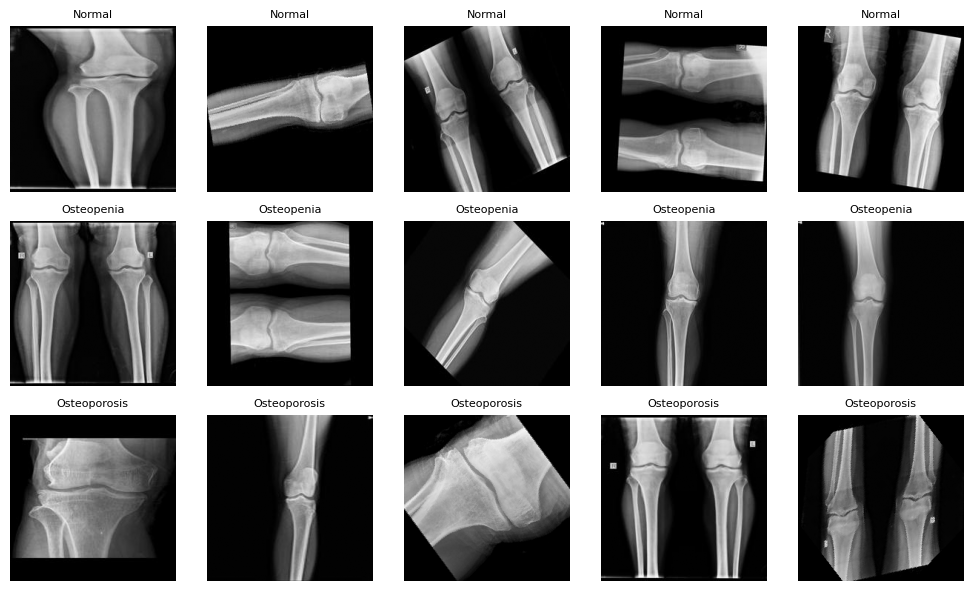

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import random

# Visualizo 5 imágenes por clase en una grilla 3x5 para tener una idea general del dataset
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, clase in enumerate(clases):
    dir_clase = f"{path}/Knee Osteoarthritis Classification/train/{clase}"
    imgs = random.sample(os.listdir(dir_clase), 5)  # 5 imágenes aleatorias
    for j in range(5):
        img = Image.open(f"{dir_clase}/{imgs[j]}").convert('L')
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f"{clase}", fontsize=8)

plt.tight_layout()
plt.show()

Se aprecia que están en escala de grises! Además ya tienen *data augmentation*, debido a que algunas imágenes se ven giradas, otras estriadas.

Veo si la cantidad de imágenes está balanceada.

In [4]:
for clase in clases:
    img_path = f"{path}/Knee Osteoarthritis Classification/train/{clase}"
    cantidad = len([f for f in os.listdir(img_path) if os.path.isfile(f"{img_path}/{f}")])
    print(f"{clase}: {cantidad} imágenes")

Normal: 1404 imágenes
Osteopenia: 1260 imágenes
Osteoporosis: 1515 imágenes


En principio parece que las clases están balanceadas.

Analizo tamaño de las imágenes.

In [5]:
img_size = set()

for clase in clases:
    img_path = f"{path}/Knee Osteoarthritis Classification/train/{clase}"
    for img_name in os.listdir(img_path):
        try:
            img = Image.open(f"{img_path}/{img_name}")
            img_size.add(img.size)  # (ancho, alto)
        except Exception as e:
            print(f"Error con {img_name}: {e}")

print("Tamaños únicos encontrados:", img_size)

Tamaños únicos encontrados: {(224, 224)}


Hago un hashing para detectar imagenes duplicadas.

In [6]:
#!pip install -q imagehash
import imagehash

hashes = set()
duplicados = 0

for clase in clases:
    dir_clase = f"{path}/Knee Osteoarthritis Classification/train/{clase}"
    for img_name in os.listdir(dir_clase):
        img = Image.open(f"{dir_clase}/{img_name}").convert('L')
        h = imagehash.phash(img)
        if h in hashes:
            duplicados += 1
        else:
            hashes.add(h)

print(f"Imágenes duplicadas: {duplicados}")

Imágenes duplicadas: 849


Veo si las imagenes con el mismo hash son efectivamente iguales.

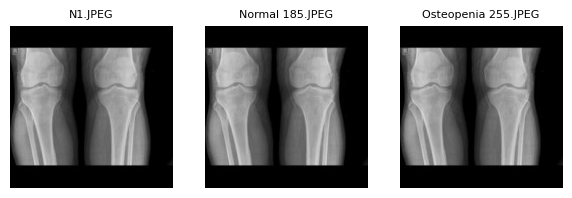

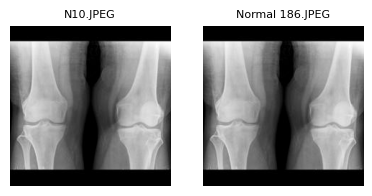

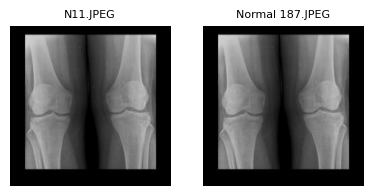

In [7]:
from collections import defaultdict

# Agrupo imágenes por hash
hash_dict = defaultdict(list)

for clase in clases:
    dir_clase = f"{path}/Knee Osteoarthritis Classification/train/{clase}"
    for img_name in os.listdir(dir_clase):
        try:
            img_path = f"{dir_clase}/{img_name}"
            img = Image.open(img_path).convert('L')
            h = imagehash.phash(img)
            hash_dict[h].append(img_path)
        except Exception as e:
            print(f"Error con {img_name}: {e}")

# Filtro los hashes con más de una imagen (posibles duplicados)
hashes_duplicados = [imgs for imgs in hash_dict.values() if len(imgs) > 1]

# Muestro algunas imagenes repetidas (limitado a los primeros 3 grupos)
# Ya probé con más de 3 grupos y se ve que son siempre iguales
for grupo in hashes_duplicados[:3]:
    fig, axs = plt.subplots(1, len(grupo), figsize=(2 * len(grupo), 2))
    for i, img_path in enumerate(grupo):
        img = Image.open(img_path)
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(os.path.basename(img_path), fontsize=8)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

Las imágenes con mismos hassh son iguales (al menos a simple vista).

Creo lista para guardar imágenes únicas.

In [8]:
imagenes_unicas = []
hashes_vistos = set()

def obtener_imagenes_unicas(path_base, clases, subcarpeta='train'):
    imagenes_unicas = []
    hashes_vistos = set()

    for clase in clases:
        dir_clase = f"{path_base}/Knee Osteoarthritis Classification/{subcarpeta}/{clase}"
        for img_name in os.listdir(dir_clase):
            img_path = f"{dir_clase}/{img_name}"
            try:
                img = Image.open(img_path).convert('L')
                h = imagehash.phash(img)
                if h not in hashes_vistos:
                    hashes_vistos.add(h)
                    imagenes_unicas.append((clase, img_path))
            except Exception as e:
                print(f"Error con {img_name}: {e}")

    return imagenes_unicas

imagenes_unicas = obtener_imagenes_unicas(path, clases, subcarpeta='train')

Veo si dentro de las imágenes únicas hay duplicados (obviamente no debería haber).

In [9]:
# Veo nuevamente si hay duplicadas dentro de las únicas
hashes = set()
duplicados = 0

for clase, img_path in imagenes_unicas:  
    img = Image.open(img_path).convert('L')
    h = imagehash.phash(img)
    if h in hashes:
        duplicados += 1
    else:
        hashes.add(h)

print(f"Imágenes duplicadas (en lista filtrada): {duplicados}")

Imágenes duplicadas (en lista filtrada): 0


Veo si en esta lista de imágenes únicas, las clases están balanceadas.

In [10]:
from collections import Counter

conteo = Counter(clase for clase, _ in imagenes_unicas)

for clase in clases:
    print(f"{clase}: {conteo[clase]} imágenes únicas")

Normal: 1110 imágenes únicas
Osteopenia: 1110 imágenes únicas
Osteoporosis: 1110 imágenes únicas


Ahora hago *data augmentation* para balancear las clases. Armo un pipeline usando **transforms** de **pyTorch**. Considero flips horizontales, rotaciones, etc.

In [11]:
import torchvision.transforms as T
import torchvision.transforms.functional as F

# Pipeline de augmentations
augment = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomAffine(degrees=360, scale=(0.9, 1.1), shear=10),
    T.Resize((224, 224))  # por si se deforma
])

while (len(obtener_imagenes_unicas(path, clases, subcarpeta='train')) < 3330):
    # Contar imágenes únicas por clase
    conteo = Counter(c for c, _ in imagenes_unicas)
    max_count = max(conteo.values())

    # Agrupar imágenes únicas por clase
    imagenes_por_clase = {clase: [] for clase in clases}
    for clase, ruta in imagenes_unicas:
        imagenes_por_clase[clase].append(ruta)

    # Aplicar augmentations para balancear
    for clase in clases:
        faltan = max_count - conteo[clase]
        if faltan <= 0:
            continue

        print(f"Generando {faltan} imágenes con data augmentation para {clase}")
        guardadas = 0
        existentes = os.listdir(f"{path}/Knee Osteoarthritis Classification/train/{clase}")

        while guardadas < faltan:
            ruta = random.choice(imagenes_por_clase[clase])
            nombre_base = os.path.splitext(os.path.basename(ruta))[0]
            img = Image.open(ruta).convert('L')  # imagen PIL escala de grises

            # Aplicar transformaciones
            img_aug = augment(img)

            # Buscar nombre nuevo sin sobrescribir
            i = 0
            while True:
                nuevo_nombre = f"{nombre_base}_aug_{i}.png"
                if nuevo_nombre not in existentes:
                    break
                i += 1

            nuevo_path = f"{path}/Knee Osteoarthritis Classification/train/{clase}/{nuevo_nombre}"
            img_aug.save(nuevo_path)
            existentes.append(nuevo_nombre)
            guardadas += 1

Actualizo la lista de imágenes únicas con las nuevas imágenes creadas.

In [12]:
imagenes_unicas = obtener_imagenes_unicas(path, clases, subcarpeta='train')

print(f"Total de imágenes únicas (train): {len(imagenes_unicas)}")

Total de imágenes únicas (train): 3330


Veo la cantidad de imágenes con *data augmentation* en los diferentes grupos.

In [13]:
for clase in clases:
    count = sum('aug' in os.path.basename(img_path).lower() for c, img_path in imagenes_unicas if c == clase)
    print(f"{clase}: {count} imágenes únicas con 'aug'")

Normal: 824 imágenes únicas con 'aug'
Osteopenia: 885 imágenes únicas con 'aug'
Osteoporosis: 907 imágenes únicas con 'aug'


Evalúo media y desvío estandar de las intensidades de los píxeles para las 3 clases.

In [14]:
import numpy as np

valores = defaultdict(list)

for clase, ruta in imagenes_unicas:
    img = Image.open(ruta).convert('RGB')
    arr = np.array(img).astype(np.float32) / 255.0
    valores[clase].append(arr.flatten())

for clase in clases:
    datos = np.concatenate(valores[clase])
    print(f"{clase}: media={datos.mean():.4f}, std={datos.std():.4f}")

Normal: media=0.2452, std=0.2861
Osteopenia: media=0.2078, std=0.2662
Osteoporosis: media=0.2081, std=0.2711


Esta información no parece muy util a la hora de realizar predicciones. Mucho solapamiento entre los rangos de las clases.

Ahora analizo la densidad de intensidad de las imágenes para los diferentes grupos (por medio de histogramas).

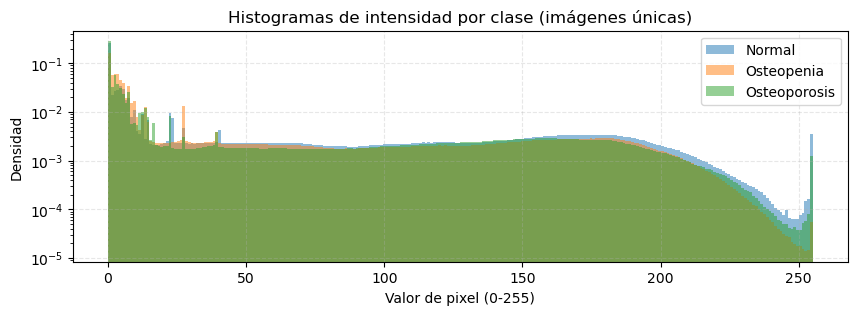

In [15]:
hist_data = defaultdict(list)

# Agrupo los arrays de píxeles por clase desde las imágenes únicas
for clase, img_path in imagenes_unicas:
    try:
        img = Image.open(img_path).convert('RGB')
        arr = np.array(img).flatten()
        hist_data[clase].append(arr)
    except Exception as e:
        print(f"Error al procesar {img_path}: {e}")

# Concatena por clase
for clase in hist_data:
    hist_data[clase] = np.concatenate(hist_data[clase])

# Graficar
plt.figure(figsize=(10, 3))
for clase, datos in hist_data.items():
    plt.hist(datos, bins=256, range=(0, 255), alpha=0.5, label=clase, density=True)

plt.title("Histogramas de intensidad por clase (imágenes únicas)")
plt.xlabel("Valor de pixel (0-255)")
plt.yscale('log')
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

A partir de los histogramas, se puede ver que existen diferencias en algunas regiones entre las diferentes clases. En particular, hay una diferencia en la zona de baja intensidad (cercanas al negro total). La diferencia en la zona de alta intensidad es muy chica (el eje y está en escala log). Esta información puede llegar a ser útil a la hora de entrenar modelos para predecir.

Ahora analizo la densidad de intensidad de las imágenes por grupo, considerando para cada uno las imágenes originales y las imágenes generadas por medio de *Data augmentation* (grafico esta información en histogramas).

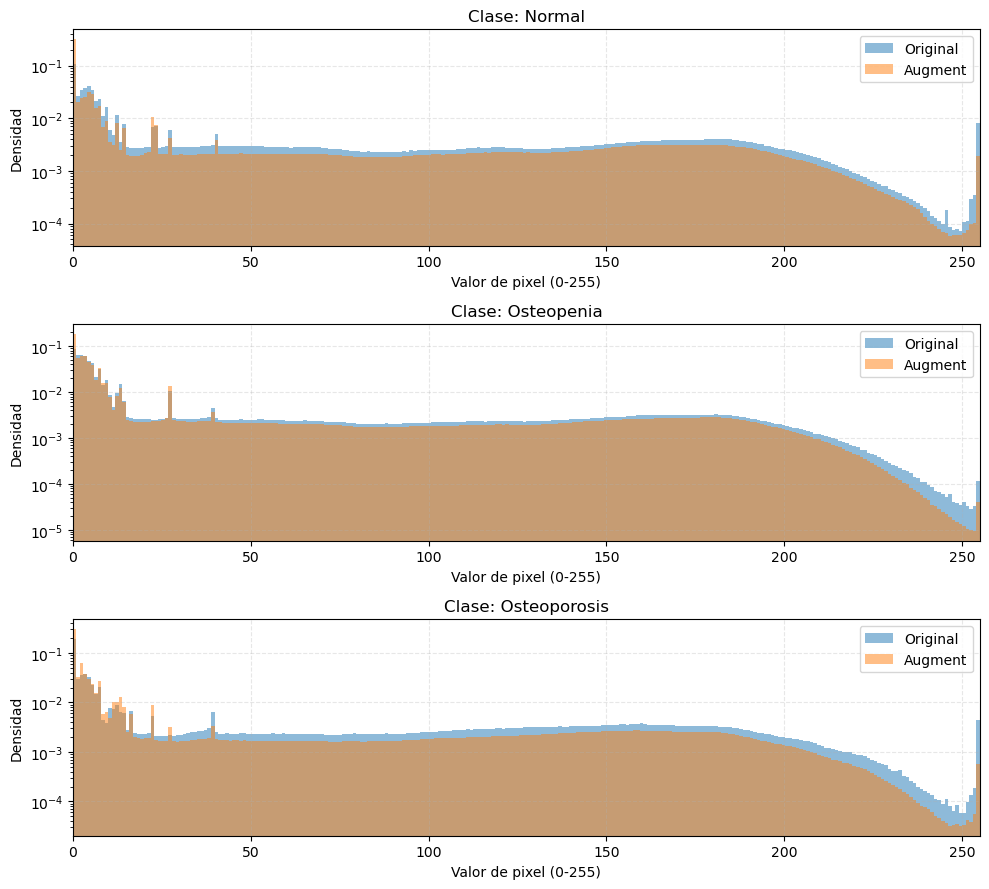

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 9))

for i, clase in enumerate(clases):
    originales = []
    augmentadas = []

    for c, img_path in imagenes_unicas:
        if c != clase:
            continue
        try:
            img = Image.open(img_path).convert('RGB')
            arr = np.array(img).flatten()

            if 'aug' in os.path.basename(img_path).lower():
                augmentadas.append(arr)
            else:
                originales.append(arr)
        except Exception as e:
            print(f"Error al procesar {img_path}: {e}")

    datos_original = np.concatenate(originales) if originales else np.array([])
    datos_aug = np.concatenate(augmentadas) if augmentadas else np.array([])

    if datos_original.size > 0:
        axs[i].hist(datos_original, bins=256, range=(0, 255), alpha=0.5, label='Original', density=True)
    if datos_aug.size > 0:
        axs[i].hist(datos_aug, bins=256, range=(0, 255), alpha=0.5, label='Augment', density=True)

    axs[i].set_title(f"Clase: {clase}")
    axs[i].set_xlim(0, 255)
    axs[i].set_xlabel("Valor de pixel (0-255)")
    axs[i].set_ylabel("Densidad")
    axs[i].legend()
    axs[i].grid(True, linestyle='--', alpha=0.3)
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

El *data augmentation*, en particular la rotación, introduce píxeles negros en las esquinas y puede eliminar regiones con información (píxeles con valores de luminosidad mayores a cero) de las imágenes originales. Por este motivo, se observan diferencias en los histogramas de intensidad entre las imágenes con *data augmentation* y las originales.

La clase con más imágenes con *data augmentation* es **Osteoporosis** (907), seguida de **Osteopenia** (885) y **Normal** (824). Esta diferencia en cantidad y contenido podría influir en el comportamiento del modelo durante el entrenamiento.

## Observaciones

A partir del Exploratory Data Analysis (EDA) realizado, se puede decir:

- **Clases balanceadas**: cada clase tiene la misma cantidad de imágenes.
- **Dimensiones uniformes**: todas las imágenes son de 224x224 píxeles.
- **Formato consistente**: todas las imágenes están en escala de grises.
- **Estadísticas**: las medias y desviaciones estándar de intensidad se solapan entre clases, por lo que no ofrecen información discriminativa clara.
- **Distribución de intensidades**: los histogramas por clase muestran diferencias leves en la distribución de píxeles, lo cual podría ser aprovechado por el modelo durante el entrenamiento.
- **Data augmentation**: se aplican transformaciones de rotación, flips horizontales, escalado y deformaciones (shear). Esto permite que el modelo aprenda a generalizar mejor frente a imágenes nuevas que no vio durante el entrenamiento.

# Preparación de datos para el entrenamiento

Ahora genero los tensores para poder entrenar los modelos. Hago una estandarización de los datos, considerando promedio y desvio estandar de todas las imágenes filtradas.

In [17]:
pixeles = []

for clase, ruta in imagenes_unicas:
    img = Image.open(ruta).convert('RGB')
    arr = np.array(img).astype(np.float32) / 255.0
    pixeles.append(arr.flatten())

pixeles = np.concatenate(pixeles)
mean = pixeles.mean()
std = pixeles.std()

print(f"Media global (únicas): {mean:.4f}")
print(f"Desvío estándar global (únicas): {std:.4f}")

Media global (únicas): 0.2204
Desvío estándar global (únicas): 0.2751


In [ ]:
import torch
# Transformación global (la misma para train, val y test)
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[mean], std=[std])
])

clase_to_idx = {c: i for i, c in enumerate(clases)}

def procesar_y_guardar_conjunto(nombre_subcarpeta, nombre_archivo_salida, usar_imagenes_unicas=False):
    datos = []
    etiquetas = []

    if usar_imagenes_unicas and nombre_subcarpeta == 'train':
        for clase, img_path in imagenes_unicas:
            img = Image.open(img_path).convert('RGB')
            tensor = transform(img)
            datos.append(tensor)
            etiquetas.append(clase_to_idx[clase])
    else:
        for clase in clases:
            carpeta = f"{path}/Knee Osteoarthritis Classification/{nombre_subcarpeta}/{clase}"
            for nombre in os.listdir(carpeta):
                img = Image.open(f"{carpeta}/{nombre}").convert('RGB')
                tensor = transform(img)
                datos.append(tensor)
                etiquetas.append(clase_to_idx[clase])

    X = torch.stack(datos)
    y = torch.tensor(etiquetas)
    torch.save((X, y), nombre_archivo_salida)
    print(f"{nombre_archivo_salida} guardado: {X.shape[0]} imágenes")
    
procesar_y_guardar_conjunto('train', 'train_normalizado.pt', usar_imagenes_unicas=True)
procesar_y_guardar_conjunto('val', 'val_normalizado.pt')
procesar_y_guardar_conjunto('test', 'test_normalizado.pt')

train_normalizado.pt guardado: 3330 imágenes
val_normalizado.pt guardado: 1080 imágenes
test_normalizado.pt guardado: 540 imágenes


El modelo puede entrenarse a partir de los archivos **.pt** generados.